<a href="https://colab.research.google.com/github/rimanoble04/DS-tutorial/blob/main/tutorial-8/hierarchial_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import fcluster


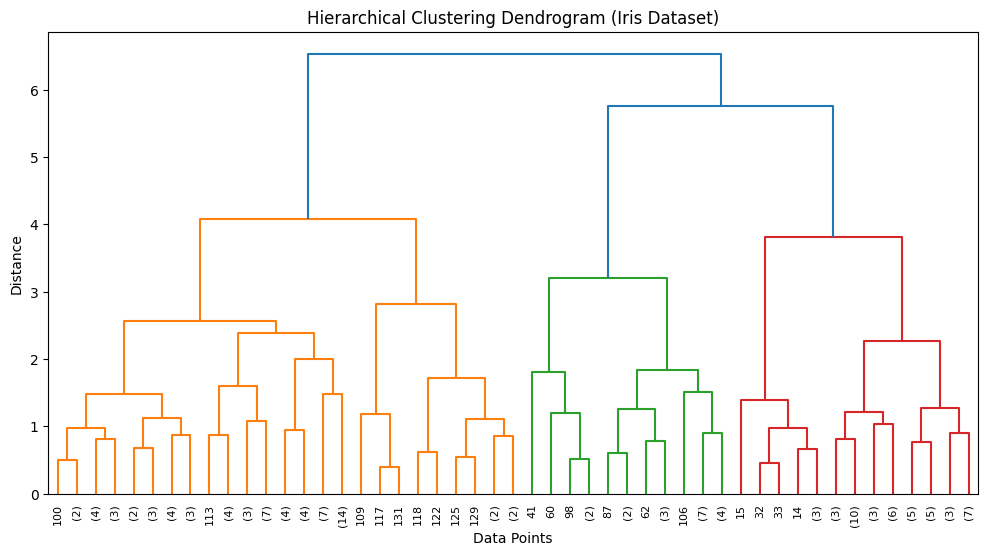

In [2]:
# Load the Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target  # True class labels

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Plot the dendrogram
plt.figure(figsize=(12, 6))
linkage_matrix = sch.linkage(X_scaled, method='complete')  # or 'ward', 'average'
sch.dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram (Iris Dataset)")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

In [3]:
# Create cluster assignments
num_clusters = 3
clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# Show first few cluster assignments
print("\nFirst 20 Cluster Assignments:", clusters[:20])

# Compare with true labels
print("\nCross-tabulation of Clusters vs True Labels:")
print(pd.crosstab(clusters, y))

# Optional: Combine into a DataFrame for analysis
X_clustered = pd.DataFrame(X_scaled, columns=iris.feature_names)
X_clustered['True_Label'] = y
X_clustered['Cluster'] = clusters


First 20 Cluster Assignments: [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]

Cross-tabulation of Clusters vs True Labels:
col_0   0   1   2
row_0            
1       0  29  48
2       1  21   2
3      49   0   0
